<a href="https://colab.research.google.com/github/Dineshkaushik21csu276ncuindia/Python_practice/blob/main/Exercise_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')

In [ ]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# Task:
1. To create a mean regression model based on "No of Floors" column and call it "floor_mean"
2. To compare the residual plots of overall "mean_sales" and "floor_mean".
3. To calculate the R-Square value for "floor_mean" model manually without using sklearn.

## 1. To create "floor_mean" column

In [ ]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()


0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [ ]:
unique_floors = data['No of Floors'].unique()
print(unique_floors)

[1.  2.  1.5 3.  2.5 3.5]


### Expected Output


```
array([1. , 2. , 1.5, 3. , 2.5, 3.5])
```


In [ ]:
floor_mean = pd.pivot_table(data, values='Sale_Price', index='No of Floors', aggfunc=np.mean)
floor_mean


,Sale_Price
No of Floors,
1.0,431826.297032
1.5,542188.988482
2.0,599260.708460
2.5,798774.472050
3.0,551141.645425
3.5,662634.375000


# Expected Output
<img src="images/image1.png">

In [ ]:
data['floor_mean'] = 0

for floor in floor_mean.index:
    data.loc[data['No of Floors'] == floor, 'floor_mean'] = floor_mean.loc[floor].values[0]

data['floor_mean'].head()


0    431826.297032
1    599260.708460
2    431826.297032
3    431826.297032
4    431826.297032
Name: floor_mean, dtype: float64

## 2. To Compare Residual plots

### Expected Output
<img src="images/image2.png">

In [ ]:
mean_difference = data['Sale_Price'] - data['mean_sales']
floor_mean_difference = data['Sale_Price'] - data['floor_mean']
mean_difference.size, floor_mean_difference.size


(21609, 21609)

### Expected Outcome
<img src="images/image3.png">

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


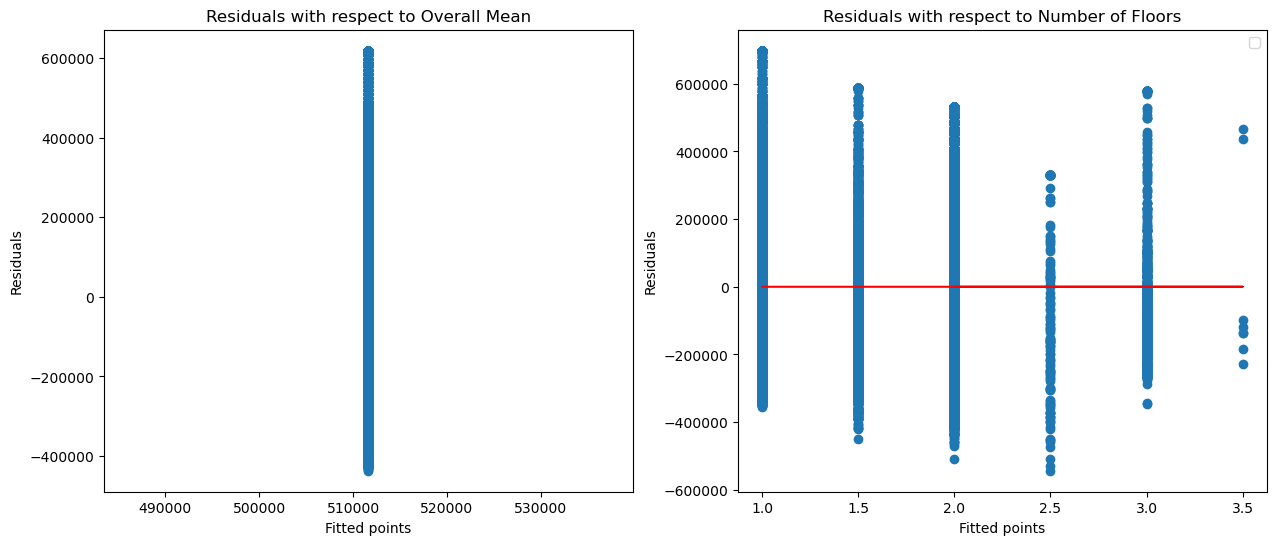

In [ ]:
k = range(0, len(data))  # for x axis
l = [0 for _ in range(len(data))]  # for regression line in residual plot

plt.figure(figsize=(15, 6), dpi=100)

# Plot for Overall Mean
plt.subplot(1, 2, 1)
plt.scatter(data['mean_sales'], mean_difference)
plt.plot(data['mean_sales'], l, color='red')
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

# Plot for Floor Mean
plt.subplot(1, 2, 2)
plt.scatter(data['No of Floors'], floor_mean_difference)
plt.plot(data['No of Floors'], l, color='red')
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title("Residuals with respect to Number of Floors")

plt.legend()
plt.show()



### Expected Outcome
<img src="images/image4.png">

## 3. To calculate $R^2$ value of the "floor_mean" model manually
<img src="images/image5.png">

In [ ]:
MSE1 = np.mean(mean_difference**2)
MSE2 = np.mean(floor_mean_difference**2)
R2 = 1 - (MSE2 / MSE1)
R2


0.10914638255441778

### Expected Outcome
<img src="images/image6.png">